In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
from collections import Counter
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  sklearn.metrics import mean_squared_error 
from numpy import expand_dims

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
metal = np.load('toose.npy')

In [3]:
cardboard = np.load('carddbo.npy')

In [4]:
glass = np.load('galssWW.npy')

In [5]:
paper = np.load('pa.npy')

In [6]:
plastic = np.load('pll.npy')

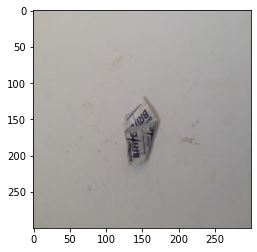

In [31]:
plt.imshow(plastic[-1].astype('uint8'))

In [7]:
s = np.array([1,2,3])
s2 = np.array([2,3,3])

In [8]:
np.append([s],[s2], axis = 1)

array([[1, 2, 3, 2, 3, 3]])

In [10]:
metal.shape

(2050, 300, 300, 3)

In [11]:
cardboard.shape

(2015, 300, 300, 3)

In [10]:
arr_x = [metal, cardboard, glass, plastic,paper]

In [13]:
#np.save('pleaseworklol', np.concatenate(tuple([arr_x[i] for i in range(len(arr_x))])))

In [3]:
X = np.load('pleaseworklol.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'pleaseworklol.npy'

In [3]:
X.shape

(11950, 300, 300, 3)

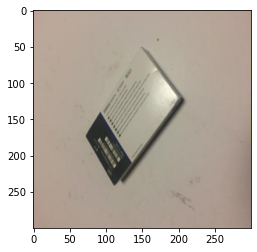

In [27]:
plt.imshow(X[-6].astype('uint8'))

In [4]:
def create_labels(array):
    y_meg = []
    for i,val in enumerate(array):
        y_meg.append(np.full((len(val),),i ))
    return y_meg

In [11]:
YY = create_labels(arr_x)

In [12]:
YY = np.array(YY)

In [13]:
YY.shape

(5,)

In [14]:
m_y = YY[0]
c_y = YY[1]
g_y = YY[2]
pl_y = YY[3]
pa_y = YY[4]

In [22]:
np.save('pleaseYY', [m_y,c_y,g_y,pl_y,pa_y],allow_pickle=True)

In [12]:
kkk = np.load('pleaseYY.npy', allow_pickle = True)

In [26]:
list(kkk)

[array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([4, 4, 4, ..., 4, 4, 4])]

In [27]:
arr_y = [m_y, c_y, g_y, pl_y, pa_y]

In [29]:
kkk = np.concatenate(tuple([arr_y[i] for i in range(len(arr_y))]))

In [31]:
kkk.shape

(11950,)

In [32]:
np.save('REEELY',kkk)

In [4]:
y = np.load('REEELY.npy')

In [5]:
y.shape

(11950,)

In [5]:
X.shape

(11950, 300, 300, 3)

In [6]:
xp, yp = shuffle(X,y)

In [7]:
#np.save('OMGOMG', xp)

In [8]:
#np.save('OMGY',yp)

In [3]:
fc = np.load('OMGOMG.npy')/(255.0)

In [4]:
fy = np.load('OMGY.npy')

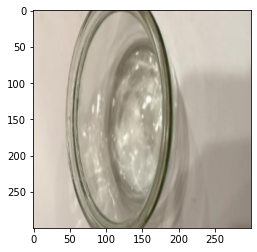

In [12]:
plt.imshow(fc[10000])

In [6]:
np.save('OMGOMG_TS', fc[-300:])

In [7]:
np.save('OMGY',fy[-300:])

In [13]:
fy[10000]

2

In [11]:
fyi =np.array(tf.keras.utils.to_categorical(fy) )

In [15]:
fc.shape

(11950, 300, 300, 3)

In [16]:
fyi.shape

(11950, 5)

In [8]:
path = r'C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\TestInco.hdf5'
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(path , monitor='val_acc', save_best_only=True, mode='max', verbose = 1)
callback_list = [checkpoint1]


In [9]:
model = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        9

In [ ]:
model.fit(fc[:-300], fyi[:-300], validation_split = 0.1, epochs = 20, callbacks = callback_list)

Train on 10485 samples, validate on 1165 samples
Epoch 1/20
10464/10485 [============================>.] - ETA: 1s - loss: 1.3149 - acc: 0.4267
Epoch 00001: val_acc improved from -inf to 0.54249, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\TestInco.hdf5
10485/10485 [==============================] - 759s 72ms/sample - loss: 1.3146 - acc: 0.4268 - val_loss: 1.1873 - val_acc: 0.5425
Epoch 2/20
10464/10485 [============================>.] - ETA: 1s - loss: 1.0778 - acc: 0.5647
Epoch 00002: val_acc improved from 0.54249 to 0.62060, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\TestInco.hdf5
10485/10485 [==============================] - 793s 76ms/sample - loss: 1.0770 - acc: 0.5650 - val_loss: 0.9499 - val_acc: 0.6206
Epoch 3/20
10464/10485 [============================>.] - ETA: 1s - loss: 0.9086 - acc: 0.6507
Epoch 00003: val_acc improved from 0.62060 to 0.67468, saving model to C:\Users\Vinayak Sidha

In [ ]:
#####THIS IS FOR THE NON TEST SET ONE

In [19]:
model.fit(fc, fyi, validation_split = 0.1, epochs = 10, callbacks = callback_list )

Train on 10755 samples, validate on 1195 samples
Epoch 1/10
10752/10755 [============================>.] - ETA: 0s - loss: 1.2725 - acc: 0.4676
Epoch 00001: val_acc improved from -inf to 0.54142, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\WWstepp.hdf5
10755/10755 [==============================] - 797s 74ms/sample - loss: 1.2725 - acc: 0.4675 - val_loss: 1.1182 - val_acc: 0.5414
Epoch 2/10
10752/10755 [============================>.] - ETA: 0s - loss: 1.0440 - acc: 0.5937
Epoch 00002: val_acc improved from 0.54142 to 0.58661, saving model to C:\Users\Vinayak Sidharth\AppData\Local\Programs\Python\Python37\Scripts\WWstepp.hdf5
10755/10755 [==============================] - 807s 75ms/sample - loss: 1.0440 - acc: 0.5937 - val_loss: 0.9987 - val_acc: 0.5866
Epoch 3/10
10752/10755 [============================>.] - ETA: 0s - loss: 0.8947 - acc: 0.6608
Epoch 00003: val_acc improved from 0.58661 to 0.64770, saving model to C:\Users\Vinayak Sidhart

In [ ]:
model.load_weights(path)

In [21]:
model.save(r'C:\Users\Vinayak Sidharth\Documents\TESTINCOFINAL.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\Vinayak Sidharth\Documents\THEFINAL74GARBAGE.model\assets
